# Machine Learning Fundamentals: The Confusion Matrix
This notebook will explain the concept of the confusion matrix, an important tool for evaluating the performance of classification models. We'll use both theory and practical examples to illustrate these concepts.

## Overview
In machine learning, especially in classification problems, we need a way to evaluate how well our model is doing. One such evaluation tool is the confusion matrix. The confusion matrix is a table layout that allows visualization of the performance of an algorithm. Each row of the matrix corresponds to the instances in an actual class while each column represents the instances in a predicted class.

## Basic Confusion Matrix
For binary classification problems, the confusion matrix is 2x2. Here's an example:

|   | Predicted: Yes | Predicted: No |
|---|---|---|
| Actual: Yes | True Positive  | False Negative  |
| Actual: No  | False Positive  | True Negative  |

1. **True Positive (TP)**: The model correctly predicted the positive class.
2. **True Negative (TN)**: The model correctly predicted the negative class.
3. **False Positive (FP)**: The model incorrectly predicted the positive class.
4. **False Negative (FN)**: The model incorrectly predicted the negative class.

## Python Example
Let's dive into a practical example using a medical dataset. In this dataset, the target variable is whether a patient has heart disease or not. We will use three different algorithms: logistic regression, random forest, and K nearest neighbors, and compare their performances using a confusion matrix.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()

# Convert to DataFrame for easier manipulation
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
rand_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Fit the models
log_reg.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions
log_reg_preds = log_reg.predict(X_test)
rand_forest_preds = rand_forest.predict(X_test)
knn_preds = knn.predict(X_test)

# Create confusion matrices
log_reg_cm = confusion_matrix(y_test, log_reg_preds)
rand_forest_cm = confusion_matrix(y_test, rand_forest_preds)
knn_cm = confusion_matrix(y_test, knn_preds)

# Print confusion matrices
print('Logistic Regression Confusion Matrix:\n', log_reg_cm)
print('Random Forest Confusion Matrix:\n', rand_forest_cm)
print('K-Nearest Neighbors Confusion Matrix:\n', knn_cm)



Logistic Regression Confusion Matrix:
 [[39  4]
 [ 1 70]]
Random Forest Confusion Matrix:
 [[40  3]
 [ 1 70]]
K-Nearest Neighbors Confusion Matrix:
 [[38  5]
 [ 0 71]]


/Users/amirhosseindaraie/miniconda3/envs/my_base/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


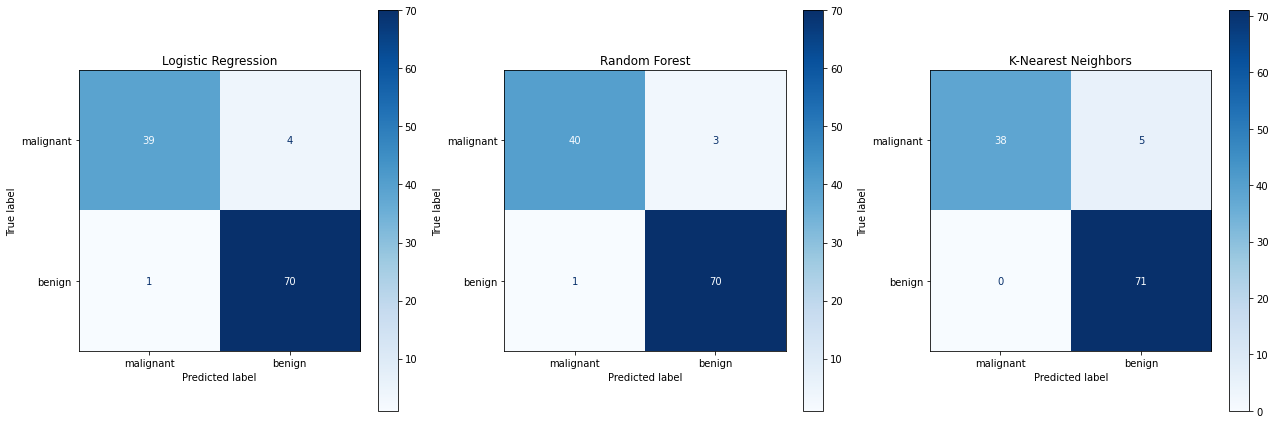

Logistic Regression Confusion Matrix:
 [[39  4]
 [ 1 70]]
Random Forest Confusion Matrix:
 [[40  3]
 [ 1 70]]
K-Nearest Neighbors Confusion Matrix:
 [[38  5]
 [ 0 71]]


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ConfusionMatrixDisplay(log_reg_cm, display_labels=cancer_data.target_names).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')

ConfusionMatrixDisplay(rand_forest_cm, display_labels=cancer_data.target_names).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest')

ConfusionMatrixDisplay(knn_cm, display_labels=cancer_data.target_names).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('K-Nearest Neighbors')

plt.tight_layout()
plt.show()

# Print confusion matrices
print('Logistic Regression Confusion Matrix:\n', log_reg_cm)
print('Random Forest Confusion Matrix:\n', rand_forest_cm)
print('K-Nearest Neighbors Confusion Matrix:\n', knn_cm)


## Advanced Confusion Matrix
For multi-class classification problems, the confusion matrix can have more than two rows and columns. Each row and column corresponds to a class. For example, if we are trying to classify favorite movies into three categories ('Troll 2', 'Gore Police', 'Cool as Ice'), the confusion matrix will be 3x3.

## Conclusion
The confusion matrix is a helpful tool for understanding the performance of a classification model. However, it's important to understand that it doesn't provide a complete picture of the model's performance. Other metrics such as precision, recall, F1 score, ROC-AUC can provide more insight and help us make a more informed decision about the model's performance.